# Model of work distribution in a flat organization

* no hierarchy
* no support staff; all infrastructure for communication and tasks works without failure
* no dark patterns

TODO:
* use realistic distributions (e.g., power law, Poisson) instead of uniform
* instead of searching randomly after exhausting the people in list of contacts, search second-order contacts
* A potential feature addition to the numerical model would be the trade-off available for training. Training could result in either an increased diversification of specializations for a given employee or a more skilled employee. Time spent in training is time spent not working. But the result of the training would be improved capacity for work

In [1]:
import random
import numpy
print("numpy", numpy.__version__)
import pandas
print("pandas", pandas.__version__)
import seaborn
print("seaborn", seaborn.__version__)
import matplotlib
print("matplotlib", matplotlib.__version__)
from matplotlib import pyplot as plt
import time
import sys
print(sys.version_info)

numpy 1.23.5
pandas 1.5.2
seaborn 0.12.2
matplotlib 3.6.2
sys.version_info(major=3, minor=10, micro=8, releaselevel='final', serial=0)


In [2]:
pandas.set_option('display.max_rows', None)
pandas.set_option('display.max_columns', None)

In [3]:
# Set the random seed value so that stochastic processes are repeatable
random.seed(10)

In [4]:
import sys
sys.path.insert(0,'../..')

import lib_simulation

### global variables for simulation

In [5]:
show_output_for_debug = False

#### user-defined

In [6]:
import PUBLICATION_configuration_simCount25_skills2_levels1_duration1_people2to10_social0_ticks100 as config

#import configuration_simCount25_skills3_levels3_duration1_people2to10_social0to8_ticks100 as config

### input validation

In [7]:
if len(config.skill_set_for_people)<1:
    raise Exception("invalid value")
if len(config.skill_set_for_tasks)<1:
    raise Exception("invalid value")
    
if config.max_skill_level_per_person<1:
    raise Exception("invalid value")
if config.max_skill_level_per_task<1:
    raise Exception("invalid value")
if config.max_task_duration_in_ticks<1:
    raise Exception("invalid value")
    
if config.min_number_of_people<1:
    raise Exception("invalid value")
if config.max_number_of_people<1:
    raise Exception("invalid value")
if ((config.min_number_of_people) > (config.max_number_of_people)):
    print(config.min_number_of_people)
    print(config.max_number_of_people)
    print((config.min_number_of_people) > (config.max_number_of_people))
    raise Exception("invalid value")

if config.min_social_circle_size<0:
    raise Exception("invalid value")
if config.max_social_circle_size<0:
    raise Exception("invalid value")
if config.min_social_circle_size>config.max_social_circle_size:
    print(config.min_social_circle_size)
    print(config.max_social_circle_size)
    raise Exception("invalid value")
    
if config.max_ticks_to_simulate<1:
    raise Exception("invalid value")
    
if config.number_of_simulations<1:
    raise Exception("invalid value")

### Simulate

In [8]:
list_of_dicts = []

start_time = time.time()
for number_of_people in range(config.min_number_of_people,config.max_number_of_people+1):
    print("number of people:",number_of_people,round(time.time()-start_time,2),"seconds")
    if True:
        if True:
            for sim_index in range(config.number_of_simulations+1):
                #print("      sim index:",sim_index,round(time.time()-start_time,2),"seconds")
                this_sim_dict = {'sim index': sim_index}

                list_of_people = []
                for person_index in range(number_of_people):
                    list_of_people.append(lib_simulation.CreatePerson(person_index, 
                                                                      config.skill_set_for_people, 
                                                                      config.max_skill_level_per_person))



                list_of_people, tasks_dict = lib_simulation.simulate(config.skill_set_for_tasks,
                                                                     config.max_skill_level_per_task,
                                                                     config.max_ticks_to_simulate,
                                                                     config.max_task_duration_in_ticks,
                                                                     config.min_social_circle_size,
                                                                     list_of_people,
                                                                     show_narrative=False, # show narrative
                                                                     work_journal=False) # work journal
    
                this_sim_dict['completed task count at tick '+str(config.max_ticks_to_simulate)] = len(tasks_dict.keys())
                this_sim_dict['number of people'] =number_of_people
                this_sim_dict['number of people in contact list'] = config.min_social_circle_size
                this_sim_dict['task duration'] = config.max_task_duration_in_ticks
                this_sim_dict['aggregate person skills'] = lib_simulation.get_aggregate_person_dict(list_of_people,
                                                                                                    config.skill_set_for_people,
                                                                                                    config.max_skill_level_per_person)
                list_of_dicts.append(this_sim_dict)

number of people: 2 0.0 seconds
number of people: 3 0.14 seconds
number of people: 4 0.3 seconds
number of people: 5 0.43 seconds
number of people: 6 0.6 seconds
number of people: 7 0.91 seconds
number of people: 8 1.24 seconds
number of people: 9 1.59 seconds
number of people: 10 2.07 seconds


## Post-simulation analysis

In [9]:
df = pandas.DataFrame(list_of_dicts)
df.head()

,sim index,completed task count at tick 100,number of people,number of people in contact list,task duration,aggregate person skills
0,0,131,2,0,1,"{'A': [1], 'B': [1]}"
1,1,102,2,0,1,"{'A': [1], 'B': [1]}"
2,2,102,2,0,1,"{'A': [1], 'B': [1]}"
3,3,155,2,0,1,"{'A': [1], 'B': [2]}"
4,4,6,2,0,1,"{'A': [0], 'B': [1]}"


In [10]:
df.shape

(234, 6)

In [11]:
list_of_people[0].skill_specialization_dict

{'A': 1, 'B': 0}

In [12]:
df.columns

Index(['sim index', 'completed task count at tick 100', 'number of people',
       'number of people in contact list', 'task duration',
       'aggregate person skills'],
      dtype='object')

In [13]:
df.max()

/tmp/ipykernel_37267/1151452817.py:1: FutureWarning: The default value of numeric_only in DataFrame.max is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.max()


sim index                            25
completed task count at tick 100    815
number of people                     10
number of people in contact list      0
task duration                         1
dtype: int64

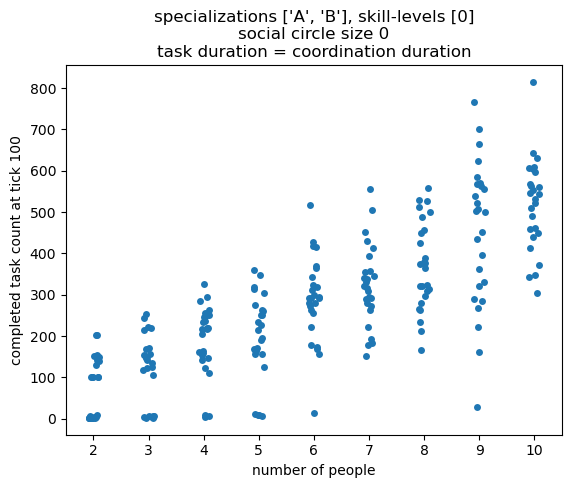

In [14]:
# https://seaborn.pydata.org/generated/seaborn.stripplot.html
seaborn.stripplot(df.loc[(df['number of people in contact list']==0) & (df['task duration']==1)], 
                  x='number of people', 
                  y='completed task count at tick '+str(config.max_ticks_to_simulate),
                  jitter=True)
plt.title("specializations "+str(config.skill_set_for_people)+
          ", skill-levels "+str(list(range(config.max_skill_level_per_person)))+
          "\nsocial circle size 0\ntask duration = coordination duration");


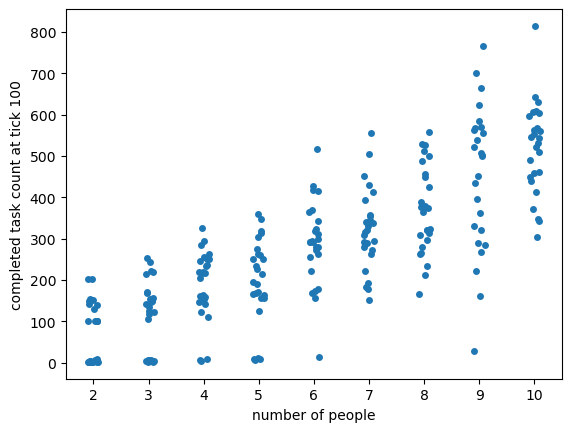

In [15]:
# https://seaborn.pydata.org/generated/seaborn.stripplot.html
seaborn.stripplot(df.loc[(df['number of people in contact list']==0) & (df['task duration']==1)], 
                  x='number of people', 
                  y='completed task count at tick '+str(config.max_ticks_to_simulate),
                  jitter=True)

# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html
plt.savefig("task_distribution_completed_versus_size_simCount"+str(config.number_of_simulations)+
            "_skills"+str(len(config.skill_set_for_people))+
            "_levels"+str(config.max_skill_level_per_person)+
            "_taskduration"+str(config.max_task_duration_in_ticks)+
            "_people"+str(config.min_number_of_people)+
            "_social"+str(config.min_social_circle_size)+
            "_ticks"+str(config.max_ticks_to_simulate)+".png", dpi=300, bbox_inches='tight')
plt.savefig("task_distribution_completed_versus_size_simCount"+str(config.number_of_simulations)+
            "_skills"+str(len(config.skill_set_for_people))+
            "_levels"+str(config.max_skill_level_per_person)+
            "_taskduration"+str(config.max_task_duration_in_ticks)+
            "_people"+str(config.min_number_of_people)+
            "_social"+str(config.min_social_circle_size)+
            "_ticks"+str(config.max_ticks_to_simulate)+".pdf", bbox_inches='tight')